In [1]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt

#### Example with 2 minimas

DCamp


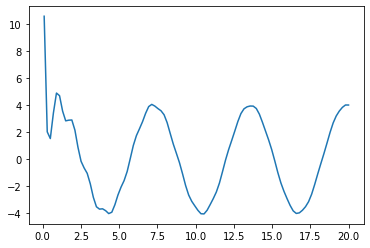

In [40]:
def loss_function(x): 
    return 4.0*tf.math.cos(x-1)+tf.divide(tf.math.cos(2.0*3.14*x),x)

xs = np.linspace(0.1, 20, 100)
ys = [ loss_function(x) for x in  xs]
plt.plot(xs, ys)
plt.show()

In [39]:

### Different initializers
x_1 = tf.Variable(6.0,tf.float32)
x_2 = tf.Variable(0.1,tf.float32)


opt = tf.keras.optimizers.SGD(learning_rate=0.1)

for j in range(100):

    opt.minimize(lambda: loss_function(x_1), var_list=[x_1])

    opt.minimize(lambda: loss_function(x_2), var_list=[x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())


4.381281 10.462479


In [36]:
# Initialize x_1 and x_2
x_1 = tf.Variable(0.05)
x_2 = tf.Variable(0.05)

# Define the optimization operation for opt_1 and opt_2
opt_1 = tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.99)
opt_2 =  tf.keras.optimizers.RMSprop(learning_rate=0.01, momentum=0.0)

for j in range(100):
    opt_1.minimize(lambda: loss_function(x_1), [x_1])
    
    opt_2.minimize(lambda: loss_function(x_2), [x_2])

# Print x_1 and x_2 as numpy arrays
print(x_1.numpy(), x_2.numpy())




4.3103795 0.4207225


In [9]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1)
var = tf.Variable(1.0)
loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1
step_count = opt.minimize(loss, [var]).numpy()
# Step is `- learning_rate * grad`
var.numpy()


0.9

In [11]:
opt = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
var = tf.Variable(1.0)
val0 = var.value()
loss = lambda: (var ** 2)/2.0         # d(loss)/d(var1) = var1
# First step is `- learning_rate * grad`
step_count = opt.minimize(loss, [var]).numpy()
val1 = var.value()
print((val0 - val1).numpy())

# On later steps, step-size increases because of momentum
step_count = opt.minimize(loss, [var]).numpy()
val2 = var.value()
(val1 - val2).numpy()


0.100000024


0.18